<a href="https://colab.research.google.com/github/jeonghoya/Machine-Learning-Programming/blob/main/week2/WISDM_ar_v1_1_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 모델 라이브러리
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings

In [3]:
import pandas as pd

# 1. 원본 txt 파일 로드 (세미콜론 제거 필요)
# 파일 마지막에 붙은 세미콜론 때문에 에러가 날 수 있어, 먼저 파일을 읽고 처리합니다.
filepath = '/content/drive/MyDrive/Colab Notebooks/WISDM_ar_v1.1_raw.txt'
data = []
with open(filepath, 'r') as f:
    for line in f:
        # 각 줄의 끝에 있는 세미콜론과 공백을 제거하고 쉼표로 분리
        cleaned_line = line.strip().rstrip(';').split(',')
        if len(cleaned_line) == 6: # 데이터가 6개 열로 완전한 경우에만 추가
            data.append(cleaned_line)

# 2. Pandas DataFrame으로 변환 및 컬럼명 지정
columns = ['user', 'activity', 'timestamp', 'x-accel', 'y-accel', 'z-accel']
df = pd.DataFrame(data, columns=columns)

# 3. 데이터 타입 변환 (숫자형으로)
df['x-accel'] = pd.to_numeric(df['x-accel'])
df['y-accel'] = pd.to_numeric(df['y-accel'])
df['z-accel'] = pd.to_numeric(df['z-accel'])

# 4. 정제된 CSV 파일로 저장
df.to_csv('WISDM_ar_v1.1_cleaned.csv', index=False)

print("CSV 파일 변환 및 저장 완료!")
display(df.head())

CSV 파일 변환 및 저장 완료!


,user,activity,timestamp,x-accel,y-accel,z-accel
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [4]:
df.isnull().sum()

,0
user,0
activity,0
timestamp,0
x-accel,0
y-accel,0
z-accel,1


In [5]:
# z-accel에 결측치가 하나라도 있는 경우 해당 행을 제거
if df['z-accel'].isnull().any():
    df.dropna(inplace=True)
    print("\n✅ 결측치가 포함된 행을 제거했습니다.")
else:
    print("\n✅ 확인 결과, 결측치가 없습니다.")

print("\n[처리 후 결측치 개수]")
print(df.isnull().sum())


✅ 결측치가 포함된 행을 제거했습니다.

[처리 후 결측치 개수]
user         0
activity     0
timestamp    0
x-accel      0
y-accel      0
z-accel      0
dtype: int64


In [6]:
df.drop(columns=['timestamp'], inplace=True)

In [7]:
display(df.head())

,user,activity,x-accel,y-accel,z-accel
0,33,Jogging,-0.694638,12.680544,0.503953
1,33,Jogging,5.012288,11.264028,0.953424
2,33,Jogging,4.903325,10.882658,-0.081722
3,33,Jogging,-0.612916,18.496431,3.023717
4,33,Jogging,-1.184970,12.108489,7.205164


In [8]:
# --- 3. 범주형 데이터 분석 (activity 컬럼) ---
print("\n\n--- 3. 활동(Activity) 데이터 분포 확인 ---")
activity_counts = df['activity'].value_counts()
print("[각 활동별 데이터 개수]")
print(activity_counts)



--- 3. 활동(Activity) 데이터 분포 확인 ---
[각 활동별 데이터 개수]
activity
Walking       418393
Jogging       336445
Upstairs      122869
Downstairs    100425
Sitting        59939
Standing       48394
Name: count, dtype: int64


/tmp/ipython-input-3992636053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='activity', data=df, order=activity_counts.index, palette='viridis')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N

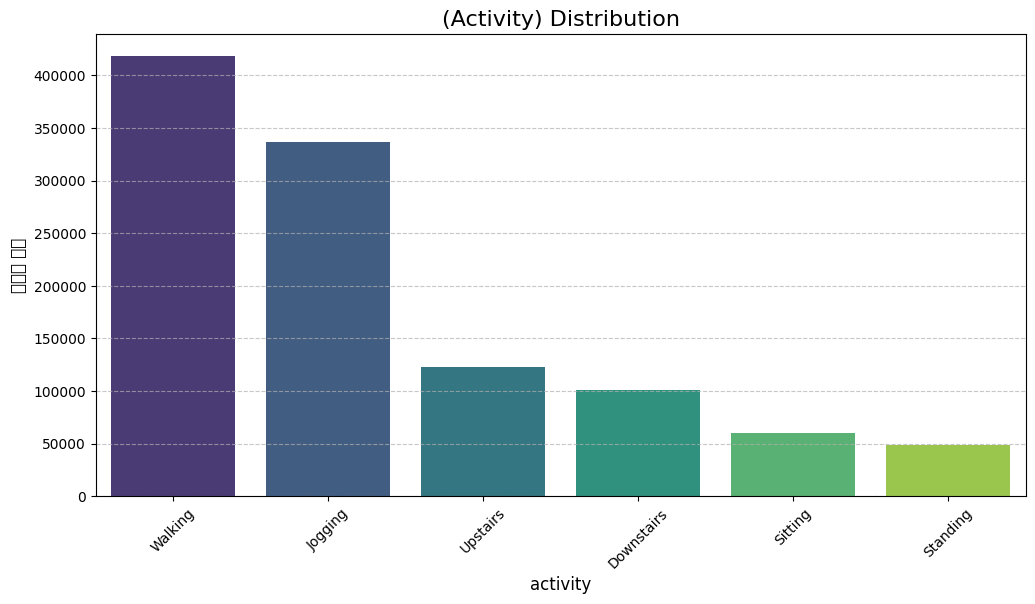

In [9]:
# 활동별 데이터 개수 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x='activity', data=df, order=activity_counts.index, palette='viridis')
plt.title('(Activity) Distribution', fontsize=16)
plt.xlabel('activity', fontsize=12)
plt.ylabel('데이터 개수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# --- 4. 수치형 데이터 분석 (가속도 센서) ---
print("\n\n--- 4. 수치형(센서) 데이터 통계치 확인 ---")
print("[가속도 센서 데이터 기술 통계량 (describe)]")
# 소수점 3자리까지만 표시
print(df[['x-accel', 'y-accel', 'z-accel']].describe().round(3))



--- 4. 수치형(센서) 데이터 통계치 확인 ---
[가속도 센서 데이터 기술 통계량 (describe)]
           x-accel      y-accel      z-accel
count  1086465.000  1086465.000  1086465.000
mean         0.664        7.246        0.398
std          6.876        6.740        4.761
min        -19.610      -19.610      -19.800
25%         -2.910        3.170       -2.220
50%          0.270        7.930        0.000
75%          4.440       11.560        2.720
max         19.950       20.040       19.610


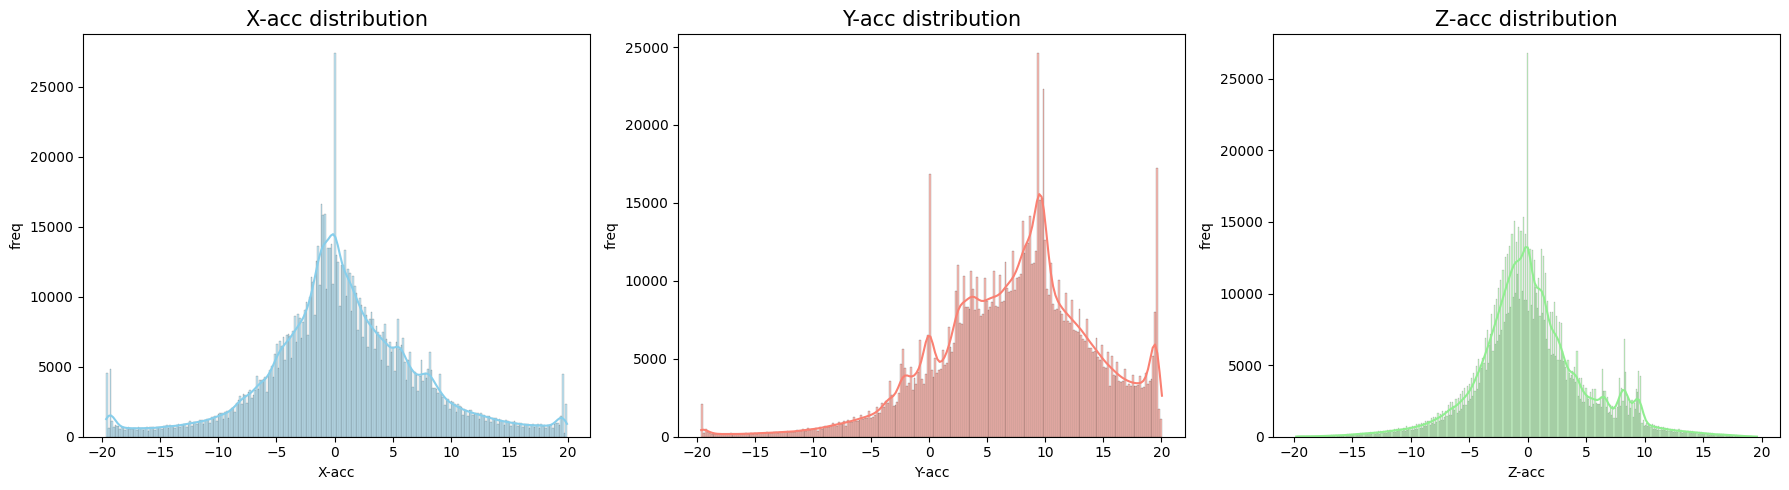

In [11]:
# 각 센서 축별 분포 시각화
plt.figure(figsize=(18, 5))

# x-accel 분포
plt.subplot(1, 3, 1)
sns.histplot(df['x-accel'], kde=True, color='skyblue')
plt.title('X-acc distribution', fontsize=15)
plt.xlabel('X-acc')
plt.ylabel('freq')

# y-accel 분포
plt.subplot(1, 3, 2)
sns.histplot(df['y-accel'], kde=True, color='salmon')
plt.title('Y-acc distribution', fontsize=15)
plt.xlabel('Y-acc')
plt.ylabel('freq')


# z-accel 분포
plt.subplot(1, 3, 3)
sns.histplot(df['z-accel'], kde=True, color='lightgreen')
plt.title('Z-acc distribution', fontsize=15)
plt.xlabel('Z-acc')
plt.ylabel('freq')

plt.tight_layout()
plt.show()

In [12]:
df.drop(columns=['user'], inplace=True, errors='ignore')

In [13]:
df.head()

,activity,x-accel,y-accel,z-accel
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [14]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

In [15]:
# 레이블 인코딩 (문자 -> 숫자)
le = LabelEncoder()
df['activity_encoded'] = le.fit_transform(df['activity'])
NUM_CLASSES = len(le.classes_)
print(f"\n활동 레이블: {le.classes_}")
print(f"클래스 개수: {NUM_CLASSES}")

# 피처 스케일링 (StandardScaler 사용)
scaler = StandardScaler()
feature_cols = ['x-accel', 'y-accel', 'z-accel']
df[feature_cols] = scaler.fit_transform(df[feature_cols])
print("✅ 데이터 전처리 완료")


활동 레이블: ['Downstairs' 'Jogging' 'Sitting' 'Standing' 'Upstairs' 'Walking']
클래스 개수: 6
✅ 데이터 전처리 완료


In [16]:
print("\n--- 레이블과 숫자 매핑 결과 ---")
# le.classes_ 배열의 인덱스가 곧 인코딩된 숫자입니다.
for idx, label in enumerate(le.classes_):
    print(f"'{label}' -> {idx}")


--- 레이블과 숫자 매핑 결과 ---
'Downstairs' -> 0
'Jogging' -> 1
'Sitting' -> 2
'Standing' -> 3
'Upstairs' -> 4
'Walking' -> 5


In [17]:
df.drop(columns=['activity'], inplace=True, errors='ignore')

In [18]:
df.head()

,x-accel,y-accel,z-accel,activity_encoded
0,-0.197600,0.806331,0.022317,1
1,0.632345,0.596159,0.116722,1
2,0.616498,0.539574,-0.100695,1
3,-0.185715,1.669250,0.551556,1
4,-0.268908,0.721454,1.429807,1


In [19]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import warnings

In [20]:
# --- 2. 슬라이딩 윈도우 생성 (메모리 최적화 버전) ---
print("\n--- 2. 슬라이딩 윈도우 생성 시작 ---")
def create_segments(df, time_steps, step, label_col, feature_cols):
    # 루프를 돌기 전에 필요한 값들을 NumPy 배열로 미리 추출 (성능 향상)
    feature_values = df[feature_cols].values
    label_values = df[label_col].values

    # 최종적으로 만들어질 segment의 정확한 개수 계산
    num_segments = len(range(0, len(df) - time_steps, step))

    # 결과를 저장할 빈 NumPy 배열 미리 생성 (메모리 효율적)
    segments = np.empty((num_segments, time_steps, len(feature_cols)))
    labels = np.empty(num_segments, dtype=int)

    idx = 0
    for i in range(0, len(df) - time_steps, step):
        segments[idx] = feature_values[i: i + time_steps]

        label_result = stats.mode(label_values[i: i + time_steps]).mode
        labels[idx] = np.array(label_result).flatten()[0]

        idx += 1

    return segments, labels


# 샘플링 주파수 및 윈도우 파라미터 설정
Fs = 20
TIME_STEPS = Fs * 4  # 80 (frame_size, 4초 분량 데이터)
STEP_SIZE = Fs * 2   # 40 (hop_size, 2초 간격, 50% 겹침)


--- 2. 슬라이딩 윈도우 생성 시작 ---


In [21]:
X, y = create_segments(df, TIME_STEPS, STEP_SIZE, 'activity_encoded', feature_cols)
print(f"✅ 생성된 세그먼트 형태: X={X.shape}, y={y.shape}")

✅ 생성된 세그먼트 형태: X=(27160, 80, 3), y=(27160,)


In [22]:
# --- 3. 데이터 분할 및 PyTorch Tensor로 변환 ---
print("\n--- 3. 데이터 분할 및 Tensor 변환 시작 ---")
# 훈련+검증 데이터와 테스트 데이터로 먼저 분할
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# 훈련 데이터를 다시 훈련 데이터와 검증 데이터로 분할
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)


--- 3. 데이터 분할 및 Tensor 변환 시작 ---


In [23]:
# PyTorch Conv1D 입력 형태: (배치, 채널, 길이)
# 현재 데이터 형태 (N, 길이, 채널) -> (N, 채널, 길이)로 변경
X_train = X_train.transpose(0, 2, 1)
X_val = X_val.transpose(0, 2, 1)
X_test = X_test.transpose(0, 2, 1)

# Numpy 배열을 PyTorch Tensor로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
print("✅ PyTorch Tensor 변환 완료")

✅ PyTorch Tensor 변환 완료


In [24]:
# --- 4. PyTorch Dataset 및 DataLoader 생성 ---
BATCH_SIZE = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
print("✅ DataLoader 준비 완료 (train, validation, test)")


✅ DataLoader 준비 완료 (train, validation, test)


In [25]:
# --- 5. 1D CNN 모델 정의 ---
class HAR_CNN(nn.Module):
    def __init__(self, num_classes, time_steps):
        super(HAR_CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(in_channels=3, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2)
        )
        # MaxPool1d를 두 번 거치므로 시간 스텝 길이는 4로 나누어짐
        self.fc1 = nn.Linear(64 * (time_steps // 4), 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1) # Flatten
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [26]:
model = HAR_CNN(num_classes=NUM_CLASSES, time_steps=TIME_STEPS)
print("\n--- 5. 모델 구조 ---")
print(model)


--- 5. 모델 구조 ---
HAR_CNN(
  (layer1): Sequential(
    (0): Conv1d(3, 32, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv1d(32, 64, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1280, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=6, bias=True)
)


In [27]:
# --- 6. 모델 훈련 및 평가 ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"\n--- 6. 모델 훈련 시작 (Device: {device}) ---")

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
NUM_EPOCHS = 20 # 에포크를 조금 늘려 변화를 관찰

# 결과를 저장할 리스트
history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}


--- 6. 모델 훈련 시작 (Device: cpu) ---


In [28]:
# 훈련 및 검증 루프
for epoch in range(NUM_EPOCHS):
    # 훈련 모드
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for segments, labels in train_loader:
        segments, labels = segments.to(device), labels.to(device)

        outputs = model(segments)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct_train / total_train
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)

    # 검증 모드
    model.eval()
    running_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for segments, labels in val_loader:
            segments, labels = segments.to(device), labels.to(device)
            outputs = model(segments)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = running_loss / len(val_loader)
    val_acc = 100 * correct_val / total_val
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)

    print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

print("✅ 모델 훈련 완료")

Epoch [1/20], Train Loss: 0.5855, Train Acc: 77.52%, Val Loss: 0.3368, Val Acc: 87.57%
Epoch [2/20], Train Loss: 0.2747, Train Acc: 90.01%, Val Loss: 0.2131, Val Acc: 93.10%
Epoch [3/20], Train Loss: 0.1853, Train Acc: 93.88%, Val Loss: 0.1564, Val Acc: 94.85%
Epoch [4/20], Train Loss: 0.1395, Train Acc: 95.37%, Val Loss: 0.1345, Val Acc: 95.84%
Epoch [5/20], Train Loss: 0.1085, Train Acc: 96.28%, Val Loss: 0.1585, Val Acc: 94.68%
Epoch [6/20], Train Loss: 0.0892, Train Acc: 97.13%, Val Loss: 0.1170, Val Acc: 96.34%
Epoch [7/20], Train Loss: 0.0729, Train Acc: 97.79%, Val Loss: 0.1102, Val Acc: 96.80%
Epoch [8/20], Train Loss: 0.0589, Train Acc: 98.02%, Val Loss: 0.1182, Val Acc: 96.48%
Epoch [9/20], Train Loss: 0.0526, Train Acc: 98.16%, Val Loss: 0.1118, Val Acc: 96.64%
Epoch [10/20], Train Loss: 0.0405, Train Acc: 98.70%, Val Loss: 0.1181, Val Acc: 96.55%
Epoch [11/20], Train Loss: 0.0351, Train Acc: 98.92%, Val Loss: 0.0979, Val Acc: 96.99%
Epoch [12/20], Train Loss: 0.0294, Train 

In [29]:
# --- 7. 최종 테스트 데이터 평가 ---
print("\n--- 7. 최종 모델 평가 시작 ---")
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    correct = 0
    total = 0
    for segments, labels in test_loader:
        segments, labels = segments.to(device), labels.to(device)
        outputs = model(segments)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
print(f'✅ 최종 테스트 데이터 정확도: {accuracy:.2f} %')


--- 7. 최종 모델 평가 시작 ---
✅ 최종 테스트 데이터 정확도: 97.16 %


In [30]:
# --- 8. Classification Report ---
print("\n--- 8. Classification Report ---")
print(classification_report(all_labels, all_preds, target_names=le.classes_))


--- 8. Classification Report ---
              precision    recall  f1-score   support

  Downstairs       0.91      0.88      0.90       503
     Jogging       0.99      0.99      0.99      1682
     Sitting       1.00      0.97      0.98       299
    Standing       0.98      0.99      0.99       242
    Upstairs       0.90      0.93      0.91       614
     Walking       0.99      0.99      0.99      2092

    accuracy                           0.97      5432
   macro avg       0.96      0.96      0.96      5432
weighted avg       0.97      0.97      0.97      5432




--- 8. 훈련 과정 시각화 ---


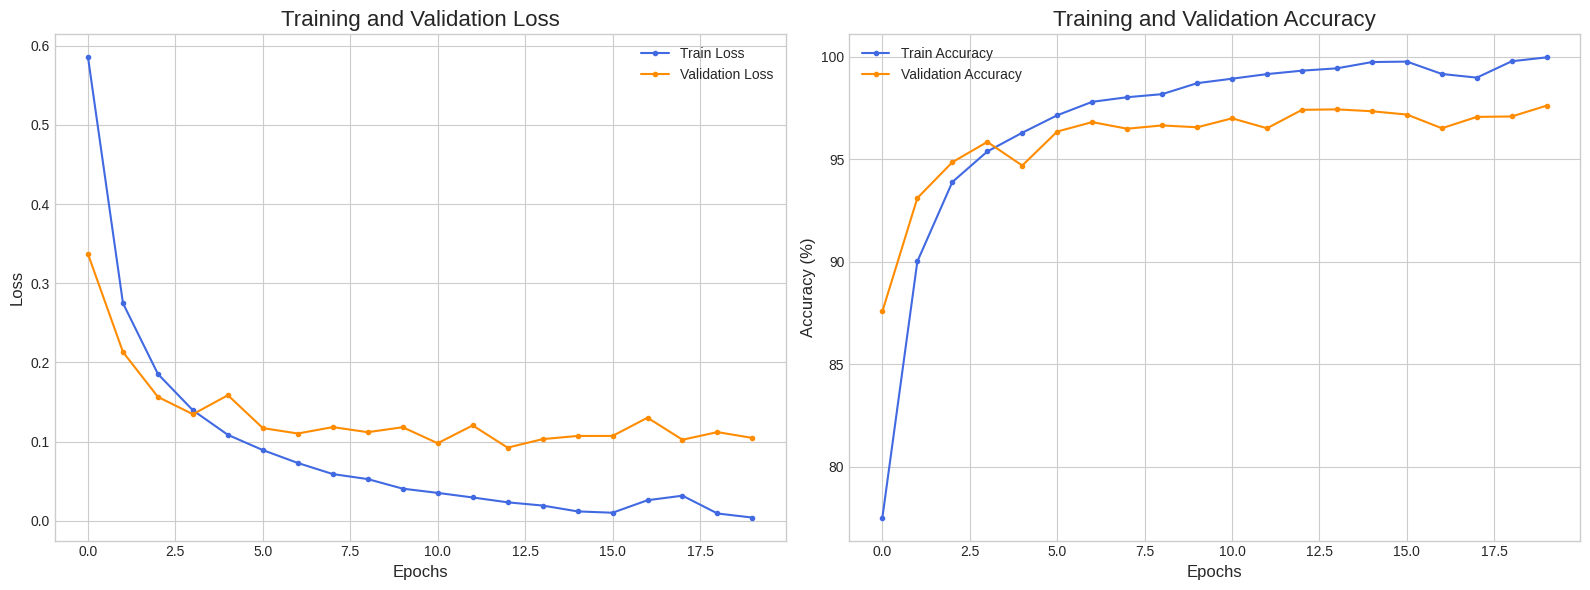

In [31]:
# --- 8. 훈련 과정 시각화 ---
print("\n--- 8. 훈련 과정 시각화 ---")
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 손실 그래프
ax1.plot(history['train_loss'], label='Train Loss', color='royalblue', marker='o', markersize=3)
ax1.plot(history['val_loss'], label='Validation Loss', color='darkorange', marker='o', markersize=3)
ax1.set_title('Training and Validation Loss', fontsize=16)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.legend()

# 정확도 그래프
ax2.plot(history['train_acc'], label='Train Accuracy', color='royalblue', marker='o', markersize=3)
ax2.plot(history['val_acc'], label='Validation Accuracy', color='darkorange', marker='o', markersize=3)
ax2.set_title('Training and Validation Accuracy', fontsize=16)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Accuracy (%)', fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()


--- 9. 결과 분석 (Confusion Matrix on Test Data) ---


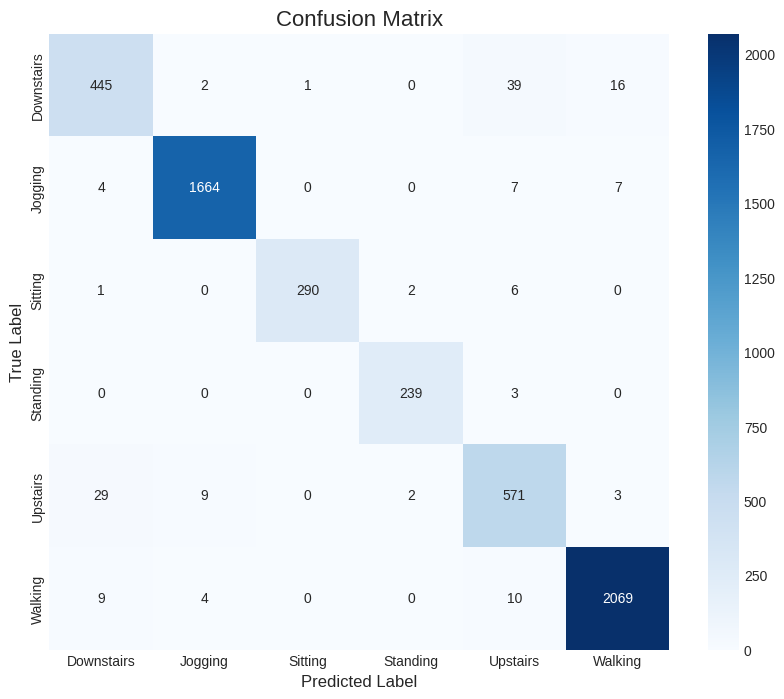

In [32]:
# --- 9. 결과 분석 (Confusion Matrix) ---
print("\n--- 9. 결과 분석 (Confusion Matrix on Test Data) ---")
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()